## Data Science Job Salaries Analysis and Prediction

In [1]:
# import requried libraries
import pandas as pd
import numpy as np
import statistics as stats
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# get the dataset
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Data Understanding

In [3]:
df.shape

(607, 12)

In [4]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

### columns avaliable in this dataset

* work_year, experience_level, employment_type, job_title
* salary, salary_currency, salary_in_usd
* employee_residence, remote_ratio
* company_location, company_size

In [6]:
column_list = df.columns

for col in column_list:
    print("Unique values of ", col, "column: \n",df[col].unique(), "\n\n")

Unique values of  Unnamed: 0 column: 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236

## Data Cleaning

In [7]:
# remove the 'Unnamed: 0 ' column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There is no missing attributes in this dataset but lets make sure to remove duplicates

#### Drop Duplicates

In [10]:
# detect duplications
df.duplicated().sum()

42

In [11]:
# drop duplications
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(565, 11)

**Change abbreviations to complete values**

The categorical variables contains some abbreviated values; to better understand, let's change them to their original names.

In [13]:
# change country names from ISO2 to original names
# There are two features containing country names, "company_location" and "employee_residence"
!pip install country_converter
import country_converter
cc = country_converter.CountryConverter()
df['company_location'] = cc.convert(df['company_location'], to='name_short')
df['employee_residence'] = cc.convert(df['employee_residence'], to='name_short')

In [14]:
print("Unique values of company location column: \n",df.company_location.unique())

Unique values of company location column: 
 ['Germany' 'Japan' 'United Kingdom' 'Honduras' 'United States' 'Hungary'
 'New Zealand' 'France' 'India' 'Pakistan' 'China' 'Greece'
 'United Arab Emirates' 'Netherlands' 'Mexico' 'Canada' 'Austria'
 'Nigeria' 'Spain' 'Portugal' 'Denmark' 'Italy' 'Croatia' 'Luxembourg'
 'Poland' 'Singapore' 'Romania' 'Iraq' 'Brazil' 'Belgium' 'Ukraine'
 'Israel' 'Russia' 'Malta' 'Chile' 'Iran' 'Colombia' 'Moldova' 'Kenya'
 'Slovenia' 'Switzerland' 'Vietnam' 'American Samoa' 'Türkiye'
 'Czech Republic' 'Algeria' 'Estonia' 'Malaysia' 'Australia' 'Ireland']


In [15]:
print("Unique values of employee residence column: \n",df.employee_residence.unique())

Unique values of employee residence column: 
 ['Germany' 'Japan' 'United Kingdom' 'Honduras' 'United States' 'Hungary'
 'New Zealand' 'France' 'India' 'Pakistan' 'Poland' 'Portugal' 'China'
 'Greece' 'United Arab Emirates' 'Netherlands' 'Mexico' 'Canada' 'Austria'
 'Nigeria' 'Philippines' 'Spain' 'Denmark' 'Russia' 'Italy' 'Croatia'
 'Bulgaria' 'Singapore' 'Brazil' 'Iraq' 'Vietnam' 'Belgium' 'Ukraine'
 'Malta' 'Chile' 'Romania' 'Iran' 'Colombia' 'Moldova' 'Kenya' 'Slovenia'
 'Hong Kong' 'Türkiye' 'Serbia' 'Puerto Rico' 'Luxembourg' 'Jersey'
 'Czech Republic' 'Argentina' 'Algeria' 'Tunisia' 'Malaysia' 'Estonia'
 'Australia' 'Bolivia' 'Ireland' 'Switzerland']


### Data formating

In [16]:
# experience level
df['experience_level'].value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

In [17]:
df['experience_level'] = df['experience_level'].map({
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
})

In [18]:
# employment type
df['employment_type'].value_counts()

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [19]:
df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

In [20]:
# company size
df['company_size'].value_counts()

M    290
L    193
S     82
Name: company_size, dtype: int64

In [21]:
df['company_size'] = df['company_size'].map({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

In [22]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,70000,EUR,79833,Germany,0,Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,50,United Kingdom,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,USD,20000,Honduras,0,Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States,50,United States,Large


In [23]:
df['work_year'].value_counts()

2022    278
2021    215
2020     72
Name: work_year, dtype: int64

**Lets explore the ratio of workers working remote**

In [24]:
df['remote_ratio'].value_counts()

100    346
0      121
50      98
Name: remote_ratio, dtype: int64

remote_ratio is expressed in three categorical values: 100 meaning fully-remote, 0 meaning fully-onsite and 50 meaning hybrid.

In [25]:
# renmame remote_ratio to job_type
df.rename(columns={'remote_ratio': 'job_type'}, inplace=True)

# change 100 to remote, 0 to onsite, 50 to hybrid
df['job_type'] = df['job_type'].map({
    100: 'remote',
    0: 'onsite',
    50: 'hybrid',
})

In [26]:
df['job_type'].value_counts()

remote    346
onsite    121
hybrid     98
Name: job_type, dtype: int64

In [27]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'job_type', 'company_location', 'company_size'],
      dtype='object')

In [28]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,70000,EUR,79833,Germany,onsite,Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,onsite,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,hybrid,United Kingdom,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,USD,20000,Honduras,onsite,Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States,hybrid,United States,Large


In [29]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
job_type              0
company_location      0
company_size          0
dtype: int64

In [30]:
df.fillna(df.mode())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,70000,EUR,79833,Germany,onsite,Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,onsite,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,hybrid,United Kingdom,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,USD,20000,Honduras,onsite,Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States,hybrid,United States,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,USD,154000,United States,remote,United States,Medium
603,2022,Senior,Full-time,Data Engineer,126000,USD,126000,United States,remote,United States,Medium
604,2022,Senior,Full-time,Data Analyst,129000,USD,129000,United States,onsite,United States,Medium
605,2022,Senior,Full-time,Data Analyst,150000,USD,150000,United States,remote,United States,Medium


**Save Clean dataframe as a new csv file**

In [31]:
df.to_csv('cleaned.csv')

## Descriptive Statistics

**Salary distribution**

Text(0.5, 1.0, 'Salary Distribution')

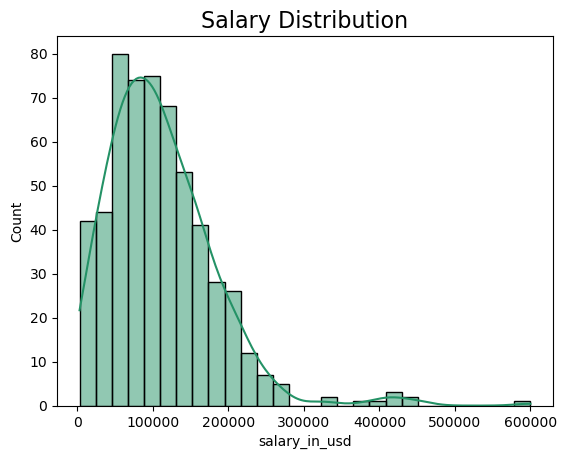

In [32]:
sns.set_palette('summer')
ax = sns.histplot(data=df, x="salary_in_usd", kde=True)
ax.set_title('Salary Distribution', fontdict={'fontsize': 16})

Really few people are earning a salary of more than $300,000

**Measures of Central Tendency**

In [39]:
mean = df['salary_in_usd'].mean()

In [40]:
median = df['salary_in_usd'].median()

In [41]:
mode = stats.mode(df['salary_in_usd'])

In [42]:
print('Measures of Central Tendency')
print('=' * 30)
print('mean  : ', mean)
print('median: ', median)
print('mode  : ', mode)

Measures of Central Tendency
mean  :  110610.34336283186
median:  100000.0
mode  :  100000


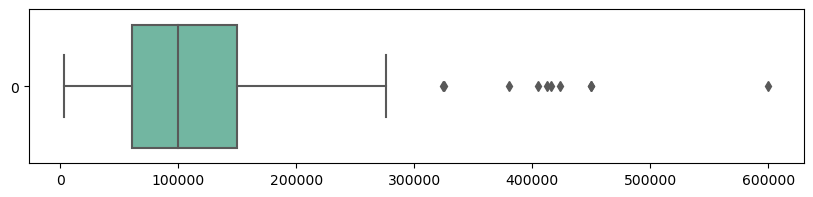

In [43]:
plt.figure(figsize=(10, 2))
ax = sns.boxplot(data=df['salary_in_usd'], orient="h", palette="Set2")

**Measures of Variability**

In [44]:
variance = stats.variance(df['salary_in_usd'])

In [45]:
std = stats.stdev(df['salary_in_usd'])

In [46]:
skew = df['salary_in_usd'].skew()

In [47]:
quantile = df['salary_in_usd'].quantile([0.25, 0.5, 0.75, 1])

In [48]:
print('Measures of Variability')
print('=' * 40)
print('Variance          : ', variance)
print('Standard deviation: ', std)
print('Skewness          : ', skew)

print('=' * 40)
print('1st Percentiles : ', quantile[0.25])
print('2nd Percentiles : ', quantile[0.5])
print('3rd Percentiles : ', quantile[0.75])
print('4th Percentiles : ', quantile[1])

Measures of Variability
Variance          :  5224499996.091113
Standard deviation:  72280.70279190091
Skewness          :  1.7328374573354977
1st Percentiles :  60757.0
2nd Percentiles :  100000.0
3rd Percentiles :  150000.0
4th Percentiles :  600000.0


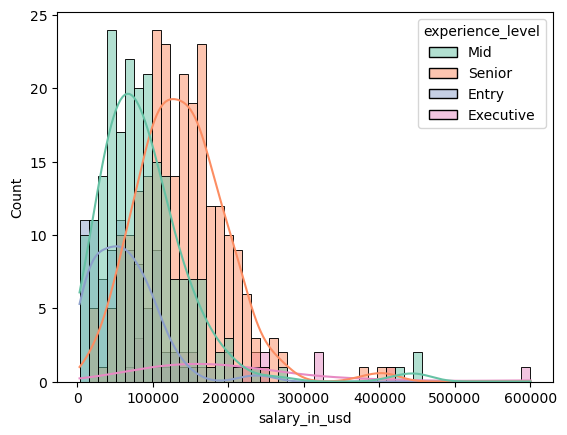

<Figure size 800x600 with 0 Axes>

In [49]:
sns.set_palette('Set2')

sns.histplot(x='salary_in_usd', data=df, kde=True, hue='experience_level',bins=50)
plt.show()

exp_levels = df['experience_level'].value_counts()
plt.figure(figsize = (8, 6), )
explode = (0.1, 0, 0,0)
colors = ['#ffb366', '#8FBAFB', '#b3ffb3', '#ff6666']

plt.show()

## Exploratory Data Analysis

**Jobs Market Size for the Past 3 years**

Text(0.5, 1.0, 'Count of Jobs by Year')

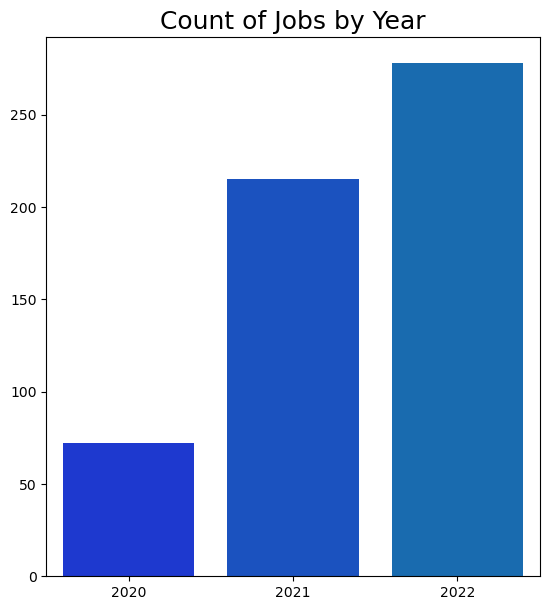

In [50]:
plt.figure(figsize=(14, 7))
sns.set_palette('winter')

year = df['work_year'].value_counts()

plt.subplot(1, 2, 1)
fig = sns.barplot(x = year.index, y = year.values)
fig.set_title('Count of Jobs by Year', fontdict={'fontsize': 18})

**Salary VS experience level**

In [51]:
# mean salary of employees with different experience levels
mean_s_exp_lv = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()
mean_s_exp_lv

experience_level
Entry         61643.318182
Mid           87792.995192
Senior       138374.880658
Executive    199392.038462
Name: salary_in_usd, dtype: float64

Text(0.5, 1.0, 'Experience Level VS Salary')

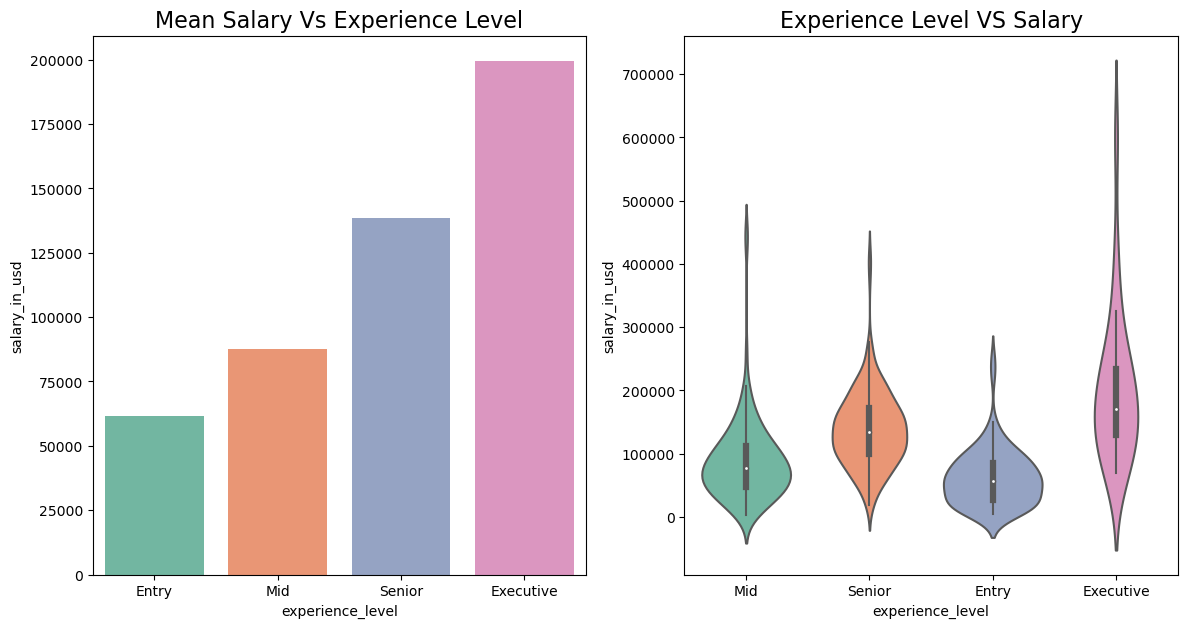

In [52]:
plt.figure(figsize=(14, 7))
sns.set_palette('Set2')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_exp_lv.index, y=mean_s_exp_lv)
ax.set_title('Mean Salary Vs Experience Level', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='experience_level', y='salary_in_usd')
ax.set_title('Experience Level VS Salary', fontdict={'fontsize': 16})

**Experience Level VS Salary:**

It can be observed that the data scientists with Executive  experience have the highest mean salary of about 200,000 USD annualy, while Entry level data scientists have the lowest mean salary of about 60,000 USD.

**Salary VS Employment Type**

In [53]:
# mean salary of employees with different employment types
mean_s_emp_type = df.groupby('employment_type')['salary_in_usd'].mean().sort_values()
mean_s_emp_type

employment_type
Part-time     33070.500000
Freelance     48000.000000
Full-time    111811.838828
Contract     184575.000000
Name: salary_in_usd, dtype: float64

Text(0.5, 1.0, 'Employment Type VS Salary')

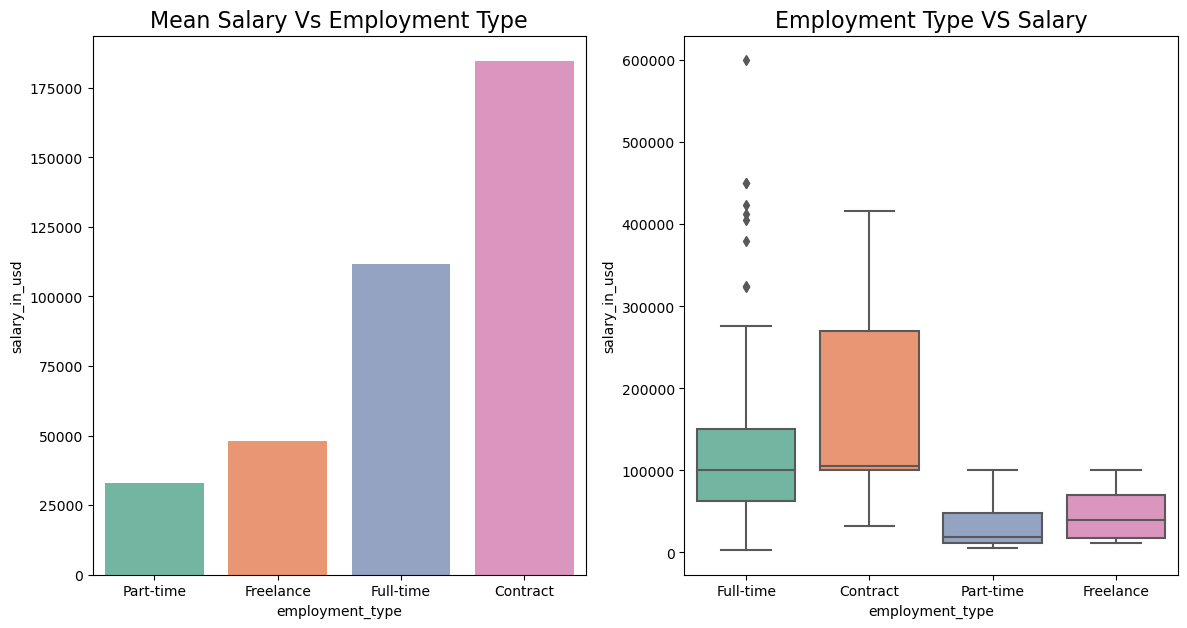

In [54]:
plt.figure(figsize=(14, 7))
sns.set_palette('Set2')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_emp_type.index, y=mean_s_emp_type)
ax.set_title('Mean Salary Vs Employment Type', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
ax = sns.boxplot(data=df, x='employment_type', y='salary_in_usd')
ax.set_title('Employment Type VS Salary', fontdict={'fontsize': 16})

**Employment Type VS Salary:**

Lookin gat the graphs above, data scientists employment who are contract employment_type have the highest mean salary of about 180,000 USD, while those working part-time have the lowest mean salary of about 30,000 USD annualy.

**Percentage of Jobs by Company Size**

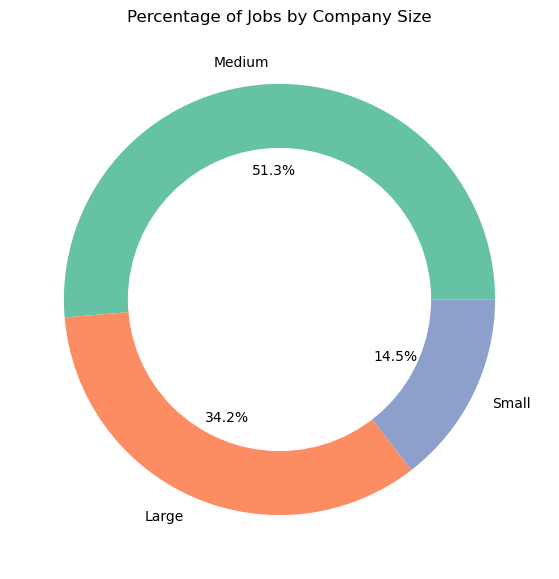

In [55]:
plt.figure(figsize=(14, 7))

size_c = df['company_size'].value_counts()
fig= plt.pie(size_c, autopct='%1.1f%%', labels=size_c.index)
plt.title('Percentage of Jobs by Company Size')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

**Salary VS Company Size**

In [56]:
# mean salary of employees from different company sizes
mean_s_cmp_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values()
mean_s_cmp_size

company_size
Small      77872.097561
Medium    114807.079310
Large     118213.880829
Name: salary_in_usd, dtype: float64

Text(0.5, 1.0, 'Company Size VS Salary')

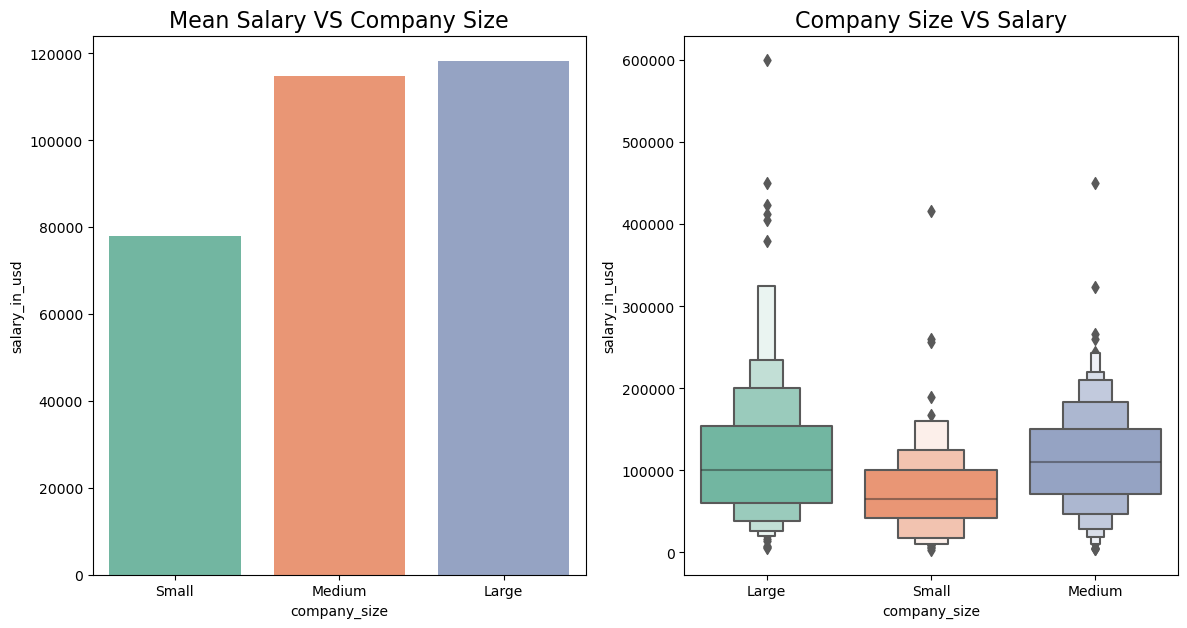

In [57]:
plt.figure(figsize=(14, 7))
sns.set_palette('Set2')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_cmp_size.index, y=mean_s_cmp_size)
ax.set_title('Mean Salary VS Company Size', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
sns.set_palette('Set2')
ax = sns.boxenplot(data=df, x='company_size', y='salary_in_usd')
ax.set_title('Company Size VS Salary', fontdict={'fontsize': 16})

**Company Size VS Salary:**

Data scientists whome are working at Large companies are compensated the highest with a mean salary of about 120,000 USD, while those working at small companies are paid the least with a mean salary of about 75,000 USD annualy.

**Salary VS Job type (remote, hybrid, onsite)**

In [58]:
# mean salary of employees with different job types
mean_s_jtype = df.groupby('job_type')['salary_in_usd'].mean().sort_values()
mean_s_jtype

job_type
hybrid     80721.897959
onsite    105785.404959
remote    120763.190751
Name: salary_in_usd, dtype: float64

Text(0.5, 1.0, 'Job Type VS Salary')

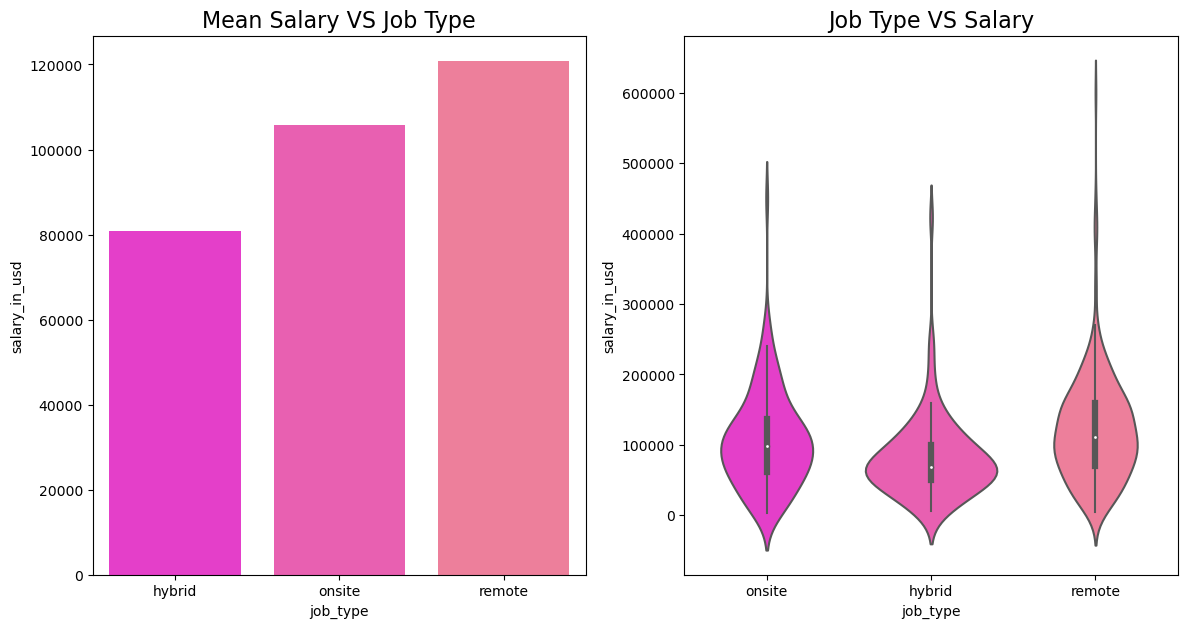

In [59]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_jtype.index, y=mean_s_jtype)
ax.set_title('Mean Salary VS Job Type', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='job_type', y='salary_in_usd')
ax.set_title('Job Type VS Salary', fontdict={'fontsize': 16})

**Job Type (remote, on-site or hybrid) VS Salary:**

Data scientists working remotely earn about 120,000 USD which is of a higher mean salary than employees who work on-site and earn about 105,000 USD. Moreover, hybrid emoloyees earn a mean salary of about 80,000 USD annualy, which is a lower than the former two emplyment type mean.

C:\Users\3mmar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Salary changes in the last three years')

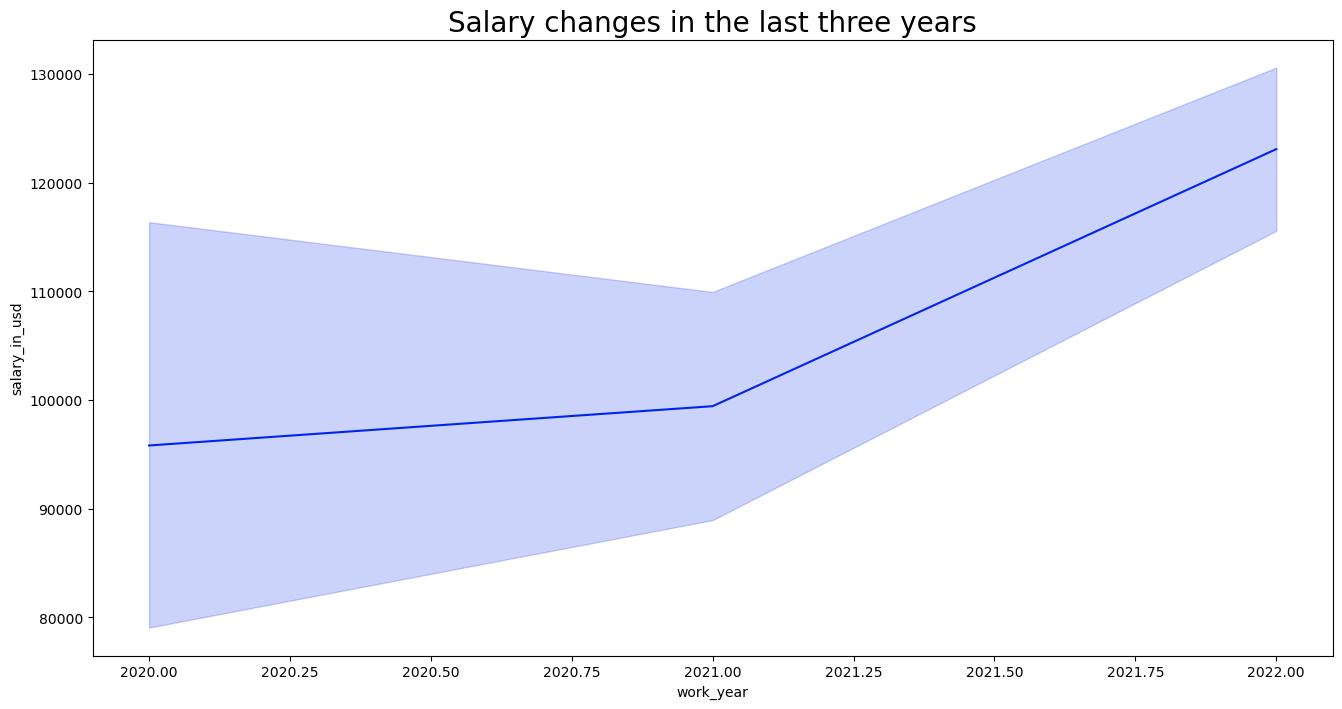

In [60]:
plt.figure(figsize=(16, 8))
sns.set_palette('winter')
sns.lineplot(df['work_year'],df['salary_in_usd'])
plt.title("Salary changes in the last three years",fontsize=20)

Text(0.5, 1.0, 'Where is the place with the most jobs ?')

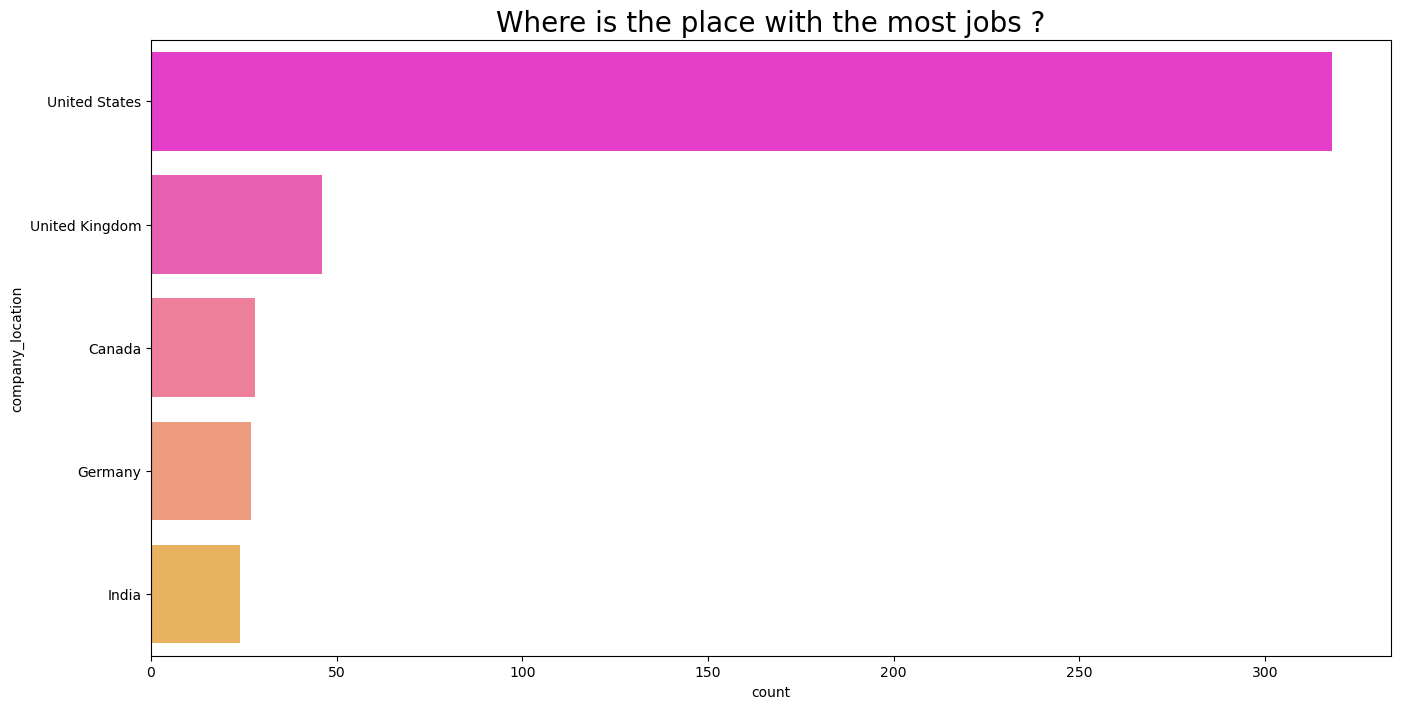

In [61]:
plt.figure(figsize=(16, 8))
sns.set_palette('spring')
sns.countplot(y=df['company_location'],order=df['company_location'].value_counts().head().index)
plt.title("Where is the place with the most jobs ?",fontsize=20)

Text(0.5, 1.0, 'What is the most frequent Job title ? ')

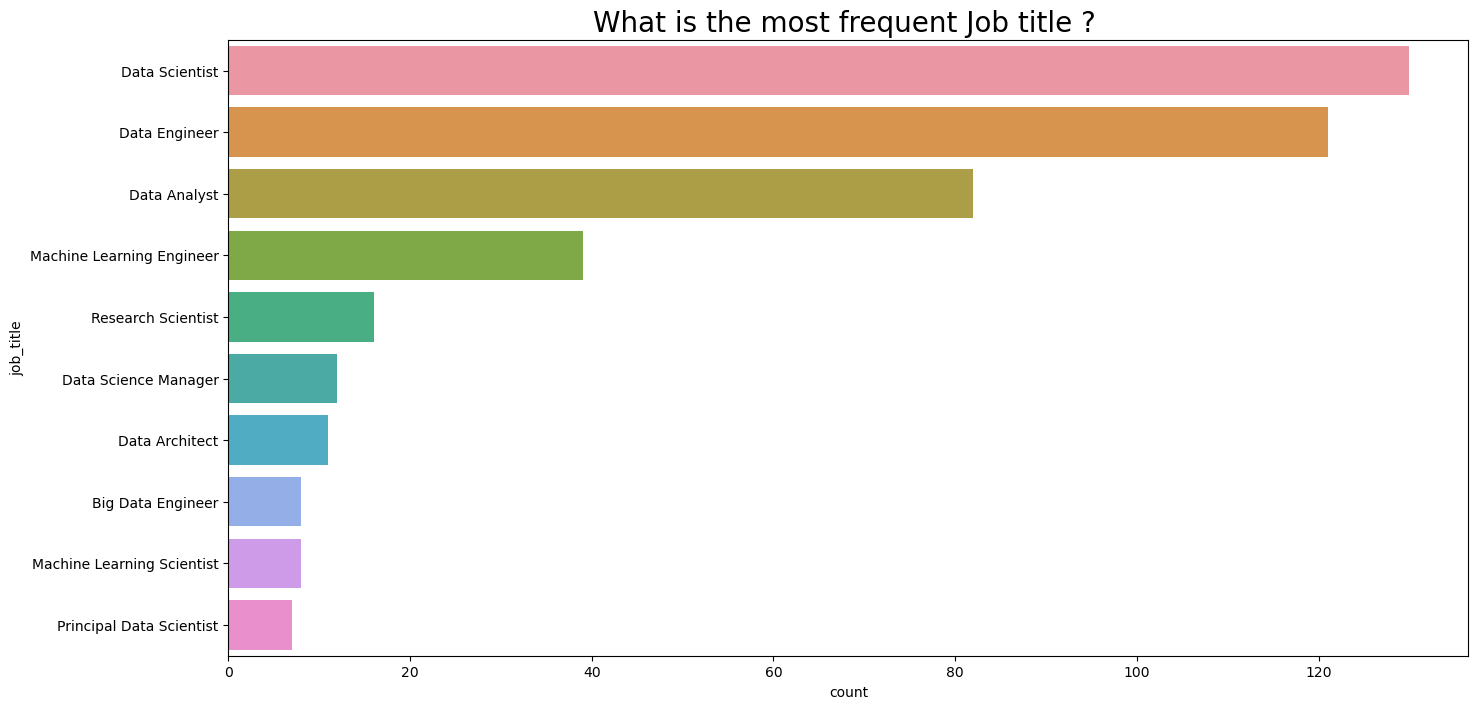

In [62]:
plt.figure(figsize=(16, 8))
sns.set_palette('Set2')
sns.countplot(y=df['job_title'],order=df['job_title'].value_counts().head(10).index)
plt.title("What is the most frequent Job title ? ",fontsize=20)

## Hypothesis testing

**Z Test**

In [63]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

def ztest(x):
    ztest ,pval = stests.ztest(df['salary_in_usd'], x2=None, value = x)
    print(float(pval))
    if pval<0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")
        

In [64]:
ztest(mean)

1.0
accept null hypothesis


In [65]:
ztest(110000)

0.840922783978523
accept null hypothesis


In [66]:
ztest(60000)

3.380735357793958e-62
reject null hypothesis


## Modelling

In [67]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,70000,EUR,79833,Germany,onsite,Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,onsite,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,hybrid,United Kingdom,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,USD,20000,Honduras,onsite,Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States,hybrid,United States,Large


**Normalizing the data**

In [68]:
data = df.copy()

In [69]:
from sklearn.preprocessing import RobustScaler

In [70]:
scaled_features = data.copy()

col_names = ['salary', 'salary_in_usd']
features = scaled_features[col_names]

scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features

In [71]:
scaled_features.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,-0.417602,EUR,-0.225979,Germany,onsite,Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,1.521173,USD,1.792858,Japan,onsite,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,-0.264541,GBP,0.101117,United Kingdom,hybrid,United Kingdom,Medium
3,2020,Mid,Full-time,Product Data Analyst,-0.927806,USD,-0.896429,Honduras,onsite,Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,0.398724,USD,0.560268,United States,hybrid,United States,Large


**Turning Categorical Columns into Numerical Columns**

In [72]:
scaled_features_dummy = scaled_features.copy()

scaled_features_dummy = pd.get_dummies(scaled_features_dummy,
                         columns = ['work_year', 'experience_level', 'employment_type',
       'job_title', 'salary_currency', 'employee_residence', 'job_type', 'company_location',
       'company_size'])
  
scaled_features_dummy.head()

,salary,salary_in_usd,work_year_2020,work_year_2021,work_year_2022,experience_level_Entry,experience_level_Executive,experience_level_Mid,experience_level_Senior,employment_type_Contract,...,company_location_Switzerland,company_location_Türkiye,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Vietnam,company_size_Large,company_size_Medium,company_size_Small
0,-0.417602,-0.225979,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.521173,1.792858,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.264541,0.101117,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,-0.927806,-0.896429,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.398724,0.560268,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


**FEATURE SELECTION & DATA SPLIT**

In [73]:
from sklearn.model_selection import train_test_split # for data split
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.metrics import mean_squared_error as m2_error

In [74]:
X_var = scaled_features_dummy.drop(['salary', 'salary_in_usd'],axis=1) # Features
y_var = scaled_features_dummy['salary_in_usd']

In [75]:
#Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 42) #80 % training and 20% testing

In [76]:
print(X_train.shape); print(X_test.shape)

(452, 191)
(113, 191)


**OneHotEncoder using pipelines**

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('one_hot_cat',OneHotEncoder())
])
 

train_pipelined = pipeline.fit_transform(X_var)

In [78]:
train_pipelined.shape

(565, 382)

**First Model (Linear Regression)**

In [79]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()

ols.fit(train_pipelined, y_var)

LinearRegression()

In [80]:
features = X_var.iloc[:5]
labels = y_var.iloc[:5]

pipelined = pipeline.transform(features)

In [81]:
ols.predict(pipelined)

array([ 0.00369044,  1.2107432 , -0.10757887, -0.8965345 ,  0.86496607])

In [82]:
list(labels)

[-0.2259785081182838,
 1.7928577031251751,
 0.10111717445625988,
 -0.8964288515625876,
 0.5602680322266173]

In [83]:
test_pipelined = pipeline.transform(X_test)

In [84]:
ols_pred = ols.predict(test_pipelined)

In [85]:
from sklearn.metrics import mean_squared_error

ols_score = ols.score(test_pipelined,y_test)
ols_score

0.6597577247309563

In [86]:
ols_RMSE = np.sqrt(m2_error(y_test, ols_pred))
ols_RMSE

0.4530178612702539

In [87]:
print('Model   : Linear Regression')
print('R2 score:', ols_score)
print('RMSE    :', ols_RMSE)

Model   : Linear Regression
R2 score: 0.6597577247309563
RMSE    : 0.4530178612702539


**Second Model (DecisionTreeRegressor)**

In [88]:
from sklearn.tree import DecisionTreeRegressor  # DecisionTreeRegressor

In [89]:
models = {
    "Decision Tree":DecisionTreeRegressor()
}

In [90]:
Results = {
    "Model":[],
    "Train Score":[],
    "Test Score":[],
    "RMSE":[]
}

In [91]:
for name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_s = r2(y_train, train_pred)
    
    y_pred = model.predict(X_test)
    test_s = r2(y_test, y_pred)
    RMSE = np.sqrt(m2_error(y_test, y_pred))
    Results["Model"].append(name)
    Results["Train Score"].append(train_s)
    Results["Test Score"].append(test_s)
    Results["RMSE"].append(RMSE)
    print("Model      : " , name)
    print("Train Score: " , train_s)
    print("Test Score : " , test_s)
    print("RMSE       : " , round(RMSE,2))
    print("===========================")

Model      :  Decision Tree
Train Score:  0.8939954216934513
Test Score :  0.42083262312429826
RMSE       :  0.59


In [94]:
RMSE_keys = ['Decision Tree', 'Linear Regression']

RMSE_values = Results["RMSE"]
RMSE_values.append(ols_RMSE)

RMSE_dict = {RMSE_keys[i]: RMSE_values[i] for i in range(len(RMSE_keys))}
RMSE_dict

{'Decision Tree': 0.5910486558308675, 'Linear Regression': 0.4530178612702539}

<BarContainer object of 2 artists>

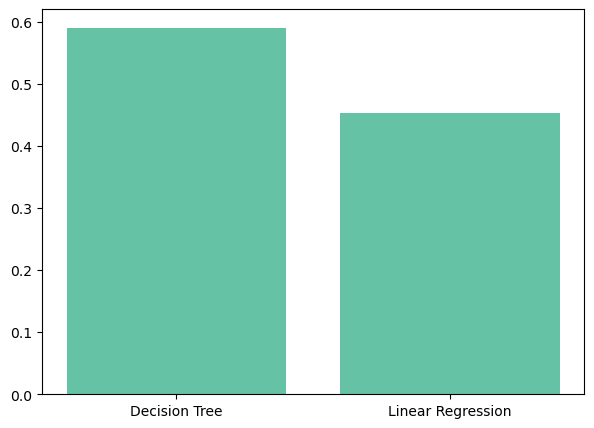

In [95]:
plt.figure(figsize=(7, 5))

keys = RMSE_dict.keys()
values = RMSE_dict.values()

plt.bar(keys, values)

**Because Linear regression has the least RMSE therefore its the best to use**

# *END, Thank You*